# 실습 - Neural Networks


# **1. 필요한 라이브러리 불러오기**

In [1]:
# 데이터, 시각화 관련 라이브러리
import numpy as np
import matplotlib.pyplot as plt

# Keras 라이브러리 
from tensorflow import keras
from tensorflow.keras import layers

# **2. MNIST 데이터 불러오기 및 전처리**

In [2]:
# Model / data parameter 설정
num_classes = 10
input_shape = (28, 28, 1)

In [3]:
# 데이터 불러오기
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
y_train[1]

In [ ]:
# 데이터를 이미지로 표현하기
plt.imshow(x_train[1].reshape(28, 28))
plt.gray()
plt.show()

In [ ]:
y_train[0]

In [7]:
# 이미지 scaling [0, 255] -> [0, 1]
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [ ]:
x_train[0,:,:]

In [ ]:
# 이미지를 (28, 28, 1) 모양으로 변환
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

In [10]:
# one-hot-encoding으로 변환 예) 0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
y_train[0]

# **3. 모델 생성**

In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

# **4. 학습하기(training)**

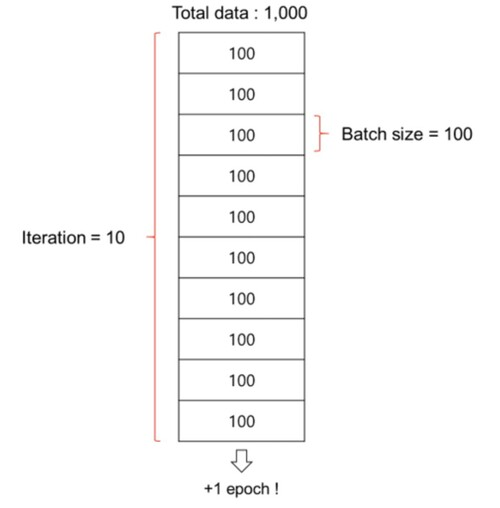

In [ ]:
# mini-batch 사이즈(한번 weight를 업데이트하기 위해 필요한 데이터의 양)
batch_size = 128

# epoch(학습과정에서 전체데이터의 사용 횟수)
epochs = 15

# objective function, optimizer 설정
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# 학습(training, fitting)
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# **5. 학습결과 확인**

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)

print("Test loss:", score[0])
print("Test accuracy:", score[1])